<a href="https://colab.research.google.com/github/tienbuilam/Heart-Disease-Prediction/blob/main/Module3_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

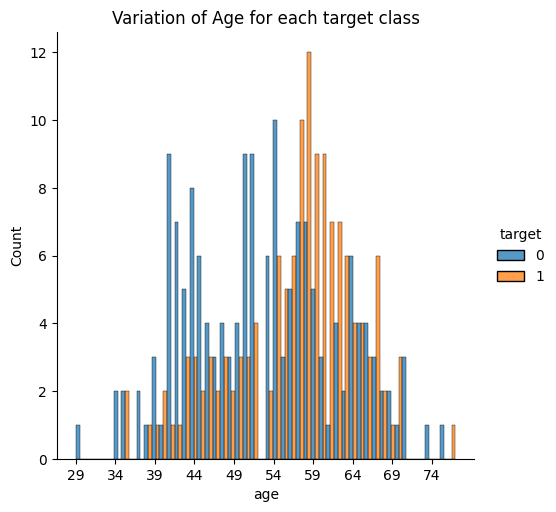

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1
df = pd.read_csv('./cleveland.csv')
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
              'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
              'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())


distribution = sns.displot(
    data=df,
    x='age', hue='target', multiple="dodge", bins=50
).set(title='Variation of Age for each target class')

plt.xticks(range(29, 77, 5))
plt.show()

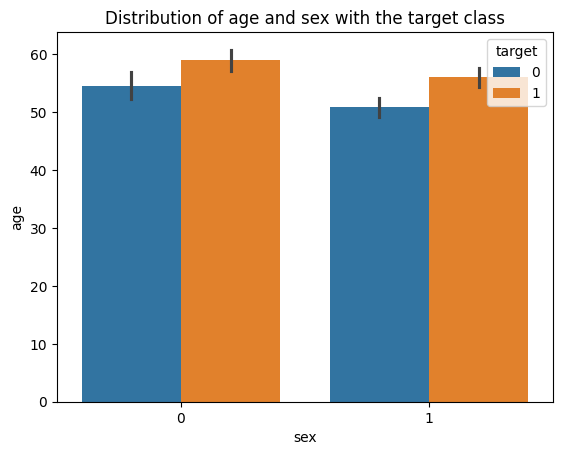

In [2]:
bar = sns.barplot(
    data=df,
    x='sex', y='age', hue='target'
).set(title='Distribution of age and sex with the target class')

plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))

print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.61


In [4]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))

print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))

Accuracy for training set for SVM = 0.67
Accuracy for test set for SVM = 0.67


In [5]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train))

print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test))

Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.85


In [7]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
dt_model.fit(X_train, y_train)
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for Decision Tree = {}'.format(accuracy_for_train))

print('Accuracy for test set for Decision Tree = {}'.format(accuracy_for_test))

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.8


In [8]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf_model = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))

print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))

Accuracy for training set for Random Forest = 0.99
Accuracy for test set for Random Forest = 0.77


In [10]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1)
ada_model.fit(X_train, y_train)
y_train_pred = ada_model.predict(X_train)
y_test_pred = ada_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for Adaboost = {}'.format(accuracy_for_train))

print('Accuracy for test set for Adaboost = {}'.format(accuracy_for_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for training set for Adaboost = 0.94
Accuracy for test set for Adaboost = 0.79


In [12]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

gra_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1, subsample=1, min_samples_split=2, max_depth=3, random_state=42)
gra_model.fit(X_train, y_train)
y_train_pred = gra_model.predict(X_train)
y_test_pred = gra_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for Gradientboost = {}'.format(accuracy_for_train))

print('Accuracy for test set for Gradientboost = {}'.format(accuracy_for_test))

Accuracy for training set for Gradientboost = 1.0
Accuracy for test set for Gradientboost = 0.8


In [14]:
!pip install xgboost

In [15]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

xgb = XGBClassifier(objective='binary:logistic', random_state=42, n_estimators=100)
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for XGboost = {}'.format(accuracy_for_train))

print('Accuracy for test set for XGboost = {}'.format(accuracy_for_test))

Accuracy for training set for XGboost = 1.0
Accuracy for test set for XGboost = 0.87


In [19]:
from logging import addLevelName
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(kernel = 'rbf', random_state=42)
xgb = XGBClassifier(objective='binary:logistic', random_state=42, n_estimators=100)
ada = AdaBoostClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)

sc = StackingClassifier(
    estimators=[('dtc', dtc), ('rfc', rfc), ('knn', knn), ('svm', svm), ('xgb', xgb), ('ada', ada), ('gc', gc)]
)

sc.fit(X_train, y_train)
y_train_pred = sc.predict(X_train)
y_test_pred = sc.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train))

print('Accuracy for test set for Stacking = {}'.format(accuracy_for_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for training set for Stacking = 1.0
Accuracy for test set for Stacking = 0.87
